<a href="https://colab.research.google.com/github/Chan-Sicpama/Chan-Blog/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%B4%EB%A1%A0_1%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C(%EC%A0%95%ED%98%95).ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting using RNN models

This jupyter notebook is based on codes from [here](https://github.com/dlmacedo/starter-academic) and datasets from

[Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) and

[Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).


## Download Dataset

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-10-26 05:00:55--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2021-10-26 05:00:55 (33.3 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



## Library

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Data Plot

The data of number of passengers.

In [3]:
training_set = pd.read_csv('airline-passengers.csv')

In [4]:
training_set.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
training_set.iloc[:10,:]

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
training_set.iloc[:,1:2]

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [7]:
training_set.iloc[:,1].values.shape, training_set.iloc[:,1].values

((144,),
 array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
        359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
        362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
        432]))

In [8]:
training_set.iloc[:,1:2].values.shape, training_set.iloc[:,1:2].values

((144, 1), array([[112],
        [118],
        [132],
        [129],
        [121],
        [135],
        [148],
        [148],
        [136],
        [119],
        [104],
        [118],
        [115],
        [126],
        [141],
        [135],
        [125],
        [149],
        [170],
        [170],
        [158],
        [133],
        [114],
        [140],
        [145],
        [150],
        [178],
        [163],
        [172],
        [178],
        [199],
        [199],
        [184],
        [162],
        [146],
        [166],
        [171],
        [180],
        [193],
        [181],
        [183],
        [218],
        [230],
        [242],
        [209],
        [191],
        [172],
        [194],
        [196],
        [196],
        [236],
        [235],
        [229],
        [243],
        [264],
        [272],
        [237],
        [211],
        [180],
        [201],
        [204],
        [188],
        [235],
        [227],
        [234],
        [264],


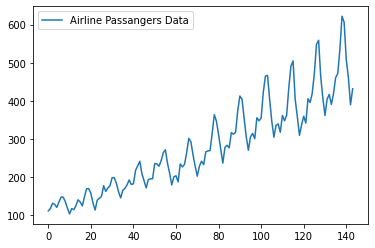

In [9]:
training_set = pd.read_csv('airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values

def plot_data(data, label):
    plt.plot(data, label=label)
    plt.legend()
    plt.show()
    
plot_data(training_set, label='Airline Passangers Data')

## Dataloading

### Data normalization
- MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

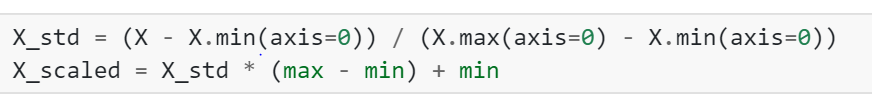

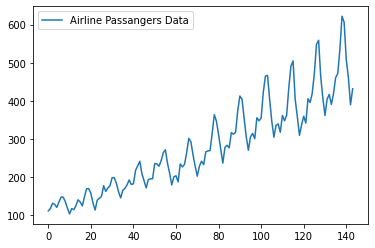

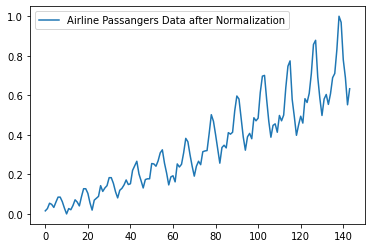

In [141]:
plot_data(training_set, label='Airline Passangers Data')

# normalize
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

plot_data(training_data, label='Airline Passangers Data after Normalization')

### What is sliding window?
- Example of sliding window technique for time-series forecasting task:

- Image source: https://eng.uber.com/2017-highlights/

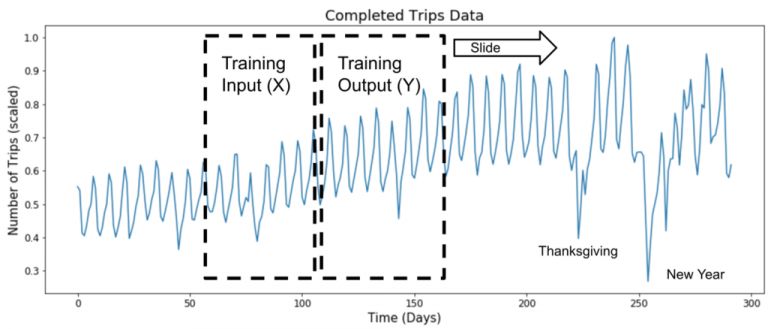

In [142]:
def sliding_windows(data, seq_length):
    x_list = []
    y_list = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        x_list.append(x)
        y_list.append(y)

    return np.array(x_list),np.array(y_list)

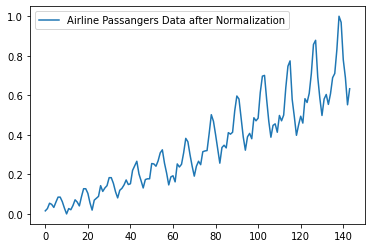

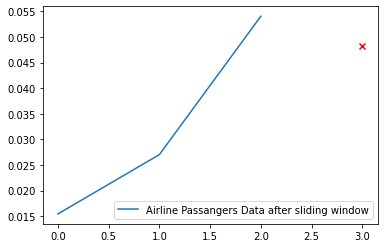

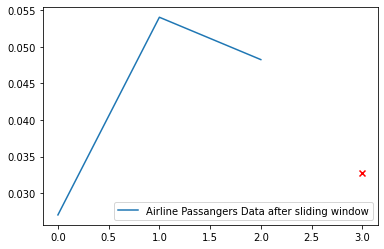

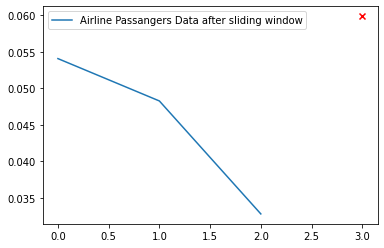

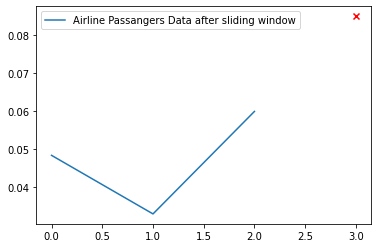

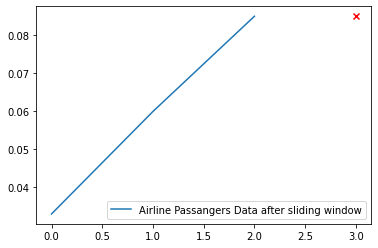

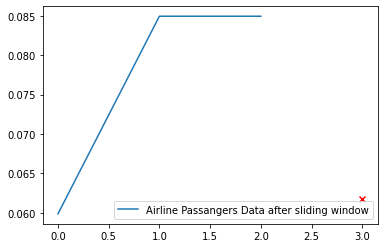

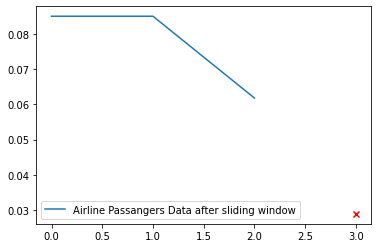

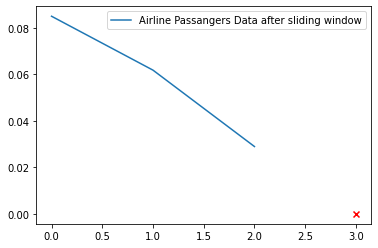

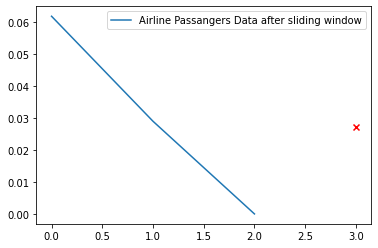

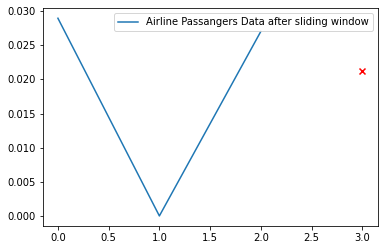

In [143]:
plot_data(training_data, label='Airline Passangers Data after Normalization')

# sliding window
x, y = sliding_windows(training_data, seq_length=3)

for i in range(10):
    plt.scatter(x.shape[1], y[i][0], marker='x', c='red')
    plot_data(x[i], label='Airline Passangers Data after sliding window')

In [147]:
# Data shape before and after applying sliding window technique
print(training_data .shape)
x, y = sliding_windows(training_data, seq_length=4)
print(x.shape, y.shape)

(144, 1)
(139, 4, 1) (139, 1)


### Model training set and test set split

In [148]:
# 7:3
training_set_size = int(len(y) * 0.7)

trainX = torch.tensor(x[:training_set_size], dtype=torch.float32)
trainY = torch.tensor(y[:training_set_size], dtype=torch.float32)

testX = torch.tensor(x[training_set_size:], dtype=torch.float32)
testY = torch.tensor(y[training_set_size:], dtype=torch.float32)

In [149]:
trainX.shape, trainY.shape, testX.shape, testY.shape

(torch.Size([97, 4, 1]),
 torch.Size([97, 1]),
 torch.Size([42, 4, 1]),
 torch.Size([42, 1]))

### PyTorch dataloader

In [150]:
class simple_dataset(Dataset):
    def __init__(self, x, y):
        super(simple_dataset, self).__init__()
        
        self.x = x
        self.y = y
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.y)
    
train_set = simple_dataset(trainX, trainY)
test_set = simple_dataset(testX, testY)
train_loader = DataLoader(dataset=train_set, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, num_workers=2, shuffle=False)

## Model

- LSTM: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
- GRU: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html
- Image source: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

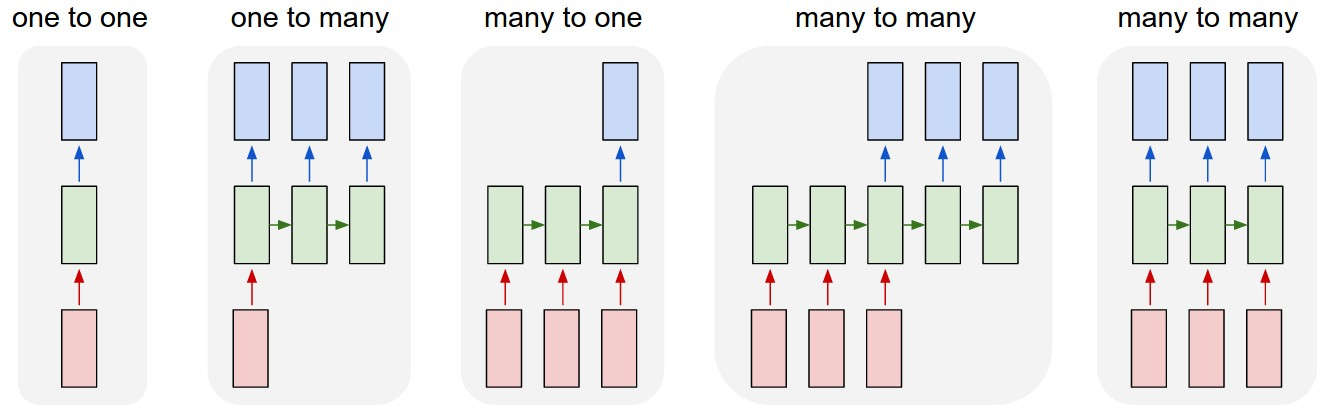


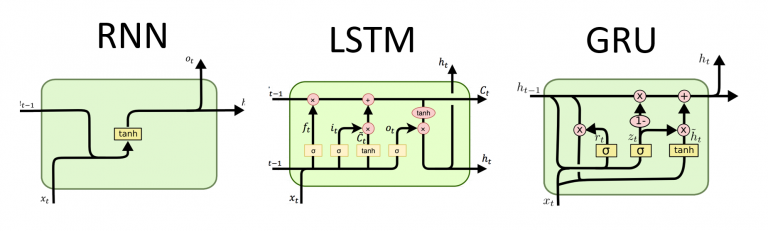

In [151]:
class LSTM_model(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers):
        super(LSTM_model, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # Layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        c_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        
        _, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out[-1]
        out = self.fc(h_out)
        
        return out

In [284]:
class GRU_model(nn.Module):
    def __init__(self, output_size, input_size, hidden_size, num_layers,dropout=0.0):
        super(GRU_model, self).__init__()
        
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.dropout =dropout
        # Layers
        self.gru = nn.GRU(  input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,dropout=self.dropout )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).cuda()
        
        _, h_out = self.gru(x, h_0)
        h_out = h_out[-1]
        out = self.fc(h_out)
        
        return out

## Training

### Experimental settings

In [235]:
num_epochs = 100
learning_rate = 0.01

output_size = 1
input_size = 1
hidden_size = 2
num_layers = 1

model = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train the model

In [236]:
model = model.cuda()
train_loss_list = []
for epoch in range(num_epochs):
    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list.append(loss)
        
    if epoch % 33 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.41183
Epoch: 33, loss: 0.00058
Epoch: 66, loss: 0.00424
Epoch: 99, loss: 0.00003


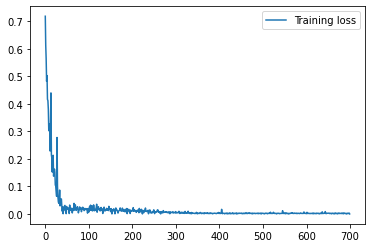

In [237]:
plot_data(train_loss_list, label='Training loss')

## Testing for Airplane Passengers Dataset

In [238]:
model.eval()

trainX = trainX.cuda()
trainY = trainY.cuda()
prediction = model(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

testX = testX.cuda()
testY = testY.cuda()
prediction = model(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0020, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0162, device='cuda:0', grad_fn=<MeanBackward0>)


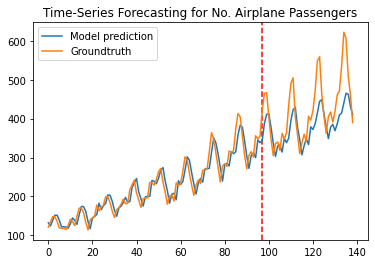

In [239]:
model.eval()

# x = torch.cat((trainX, testX), 0)
# y = torch.cat((trainY, testY), 0).data.cpu().numpy()

predictions = model(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()

## 1번째 하이퍼 파리미터

In [263]:
num_epochs = 100
learning_rate = 0.01

output_size = 1
input_size = 1
hidden_size = 2
num_layers = 2

model2 = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion2 = torch.nn.MSELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [264]:
model2 = model2.cuda()
train_loss_list2 = []
for epoch in range(num_epochs):
    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model2(input_seq)
        loss2 = criterion2(preds, label)
        
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()

        train_loss_list2.append(loss2)
        
    if epoch % 33 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss2.item()))

Epoch: 0, loss: 0.00000
Epoch: 33, loss: 0.00197
Epoch: 66, loss: 0.00001
Epoch: 99, loss: 0.00287


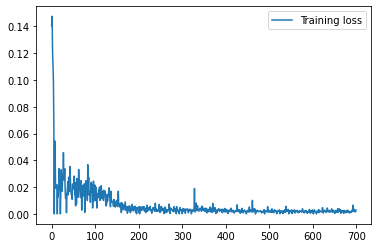

In [265]:
plot_data(train_loss_list2, label='Training loss')

In [266]:
model2.eval()

trainX = trainX.cuda()
trainY = trainY.cuda()
prediction = model2(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

testX = testX.cuda()
testY = testY.cuda()
prediction = model2(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0018, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0112, device='cuda:0', grad_fn=<MeanBackward0>)


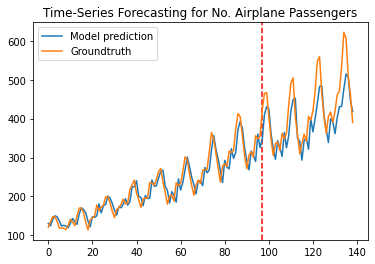

In [267]:
model2.eval()

x = torch.cat((trainX, testX), 0)
y = torch.cat((trainY, testY), 0).data.cpu().numpy()

predictions = model2(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()

## 두번째 하이퍼 파라미터

In [268]:
num_epochs = 300
learning_rate = 0.001

output_size = 1
input_size = 1
hidden_size = 2
num_layers = 2

model3 = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

In [269]:
model3 = model3.cuda()
train_loss_list3 = []
for epoch in range(num_epochs):

    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model3(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list3.append(loss)
        
    if (epoch+1) % 10 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.04870
Epoch: 19, loss: 0.01607
Epoch: 29, loss: 0.00326
Epoch: 39, loss: 0.02837
Epoch: 49, loss: 0.00189
Epoch: 59, loss: 0.01459
Epoch: 69, loss: 0.00002
Epoch: 79, loss: 0.02051
Epoch: 89, loss: 0.02666
Epoch: 99, loss: 0.01517
Epoch: 109, loss: 0.00452
Epoch: 119, loss: 0.00226
Epoch: 129, loss: 0.00016
Epoch: 139, loss: 0.01379
Epoch: 149, loss: 0.00466
Epoch: 159, loss: 0.00169
Epoch: 169, loss: 0.00285
Epoch: 179, loss: 0.00399
Epoch: 189, loss: 0.00001
Epoch: 199, loss: 0.00003
Epoch: 209, loss: 0.00089
Epoch: 219, loss: 0.00034
Epoch: 229, loss: 0.00005
Epoch: 239, loss: 0.00003
Epoch: 249, loss: 0.00063
Epoch: 259, loss: 0.00045
Epoch: 269, loss: 0.00010
Epoch: 279, loss: 0.00175
Epoch: 289, loss: 0.00169
Epoch: 299, loss: 0.00002


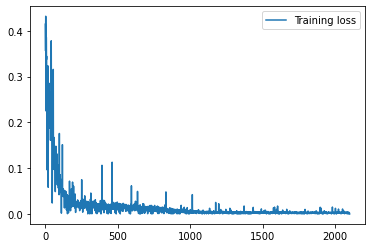

In [270]:
plot_data(train_loss_list3, label='Training loss')

In [271]:
model3.eval()

trainX = trainX.cuda()
trainY = trainY.cuda()
prediction = model3(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

testX = testX.cuda()
testY = testY.cuda()
prediction = model3(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0024, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0124, device='cuda:0', grad_fn=<MeanBackward0>)


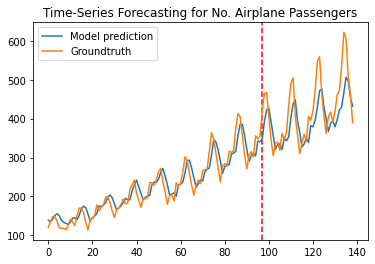

In [272]:
model3.eval()

x = torch.cat((trainX, testX), 0)
y = torch.cat((trainY, testY), 0).data.cpu().numpy()

predictions = model3(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()

3번째 하이퍼 파라미터

In [274]:
num_epochs = 300
learning_rate = 0.001

output_size = 1
input_size = 1
hidden_size = 4
num_layers = 2

model4 = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model4.parameters(), lr=learning_rate)

In [275]:
model4 = model4.cuda()
train_loss_list4 = []
for epoch in range(num_epochs):

    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model4(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list4.append(loss)
        
    if (epoch+1) % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 99, loss: 0.00088
Epoch: 199, loss: 0.00083
Epoch: 299, loss: 0.00014


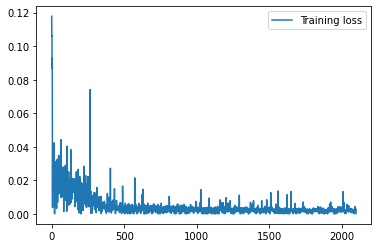

In [276]:
plot_data(train_loss_list4, label='Training loss')

In [277]:
model4.eval()

prediction = model4(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

prediction = model4(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0087, device='cuda:0', grad_fn=<MeanBackward0>)


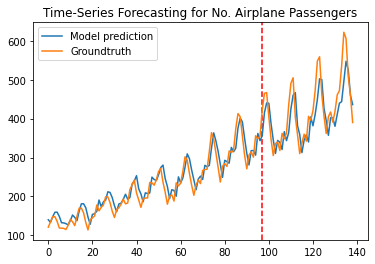

In [278]:
model4.eval()

predictions = model4(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()

In [279]:
num_epochs = 1000
learning_rate = 0.001

output_size = 1
input_size = 1
hidden_size = 32
num_layers = 1

model5 = GRU_model(output_size, input_size, hidden_size, num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model5.parameters(), lr=learning_rate)

In [280]:
model5 = model5.cuda()
train_loss_list5 = []
for epoch in range(num_epochs):

    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model5(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list5.append(loss)
        
    if (epoch+1) % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 99, loss: 0.01576
Epoch: 199, loss: 0.00033
Epoch: 299, loss: 0.00602
Epoch: 399, loss: 0.00490
Epoch: 499, loss: 0.00089
Epoch: 599, loss: 0.00253
Epoch: 699, loss: 0.00055
Epoch: 799, loss: 0.00016
Epoch: 899, loss: 0.00018
Epoch: 999, loss: 0.00004


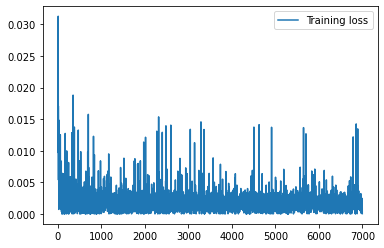

In [281]:
plot_data(train_loss_list5, label='Training loss')

In [282]:
model5.eval()

prediction = model5(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

prediction = model5(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0016, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0181, device='cuda:0', grad_fn=<MeanBackward0>)


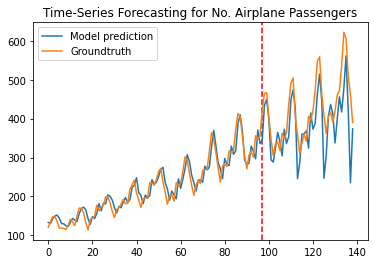

In [283]:
model5.eval()

predictions = model5(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()

In [285]:
num_epochs = 100
learning_rate = 0.01

output_size = 1
input_size = 1
hidden_size = 32
num_layers = 1
drop_out = 0.2
model6 = GRU_model(output_size, input_size, hidden_size, num_layers, drop_out)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model6.parameters(), lr=learning_rate)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [286]:
model6 = model6.cuda()
train_loss_list6 = []
for epoch in range(num_epochs):

    for input_seq, label in train_loader:
        input_seq = input_seq.cuda()
        label = label.cuda()

        preds = model6(input_seq)
        loss = criterion(preds, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_list6.append(loss)
        
    if (epoch+1) % 10 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 9, loss: 0.00500
Epoch: 19, loss: 0.00120
Epoch: 29, loss: 0.00215
Epoch: 39, loss: 0.00058
Epoch: 49, loss: 0.00001
Epoch: 59, loss: 0.00249
Epoch: 69, loss: 0.00410
Epoch: 79, loss: 0.00152
Epoch: 89, loss: 0.00129
Epoch: 99, loss: 0.00380


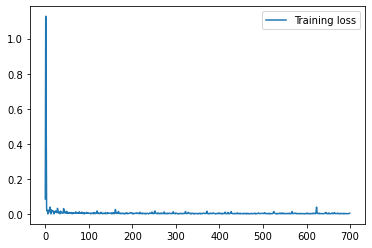

In [287]:
plot_data(train_loss_list6, label='Training loss')

In [288]:
model6.eval()

prediction = model6(trainX)
mean_squared_error = criterion(prediction, trainY)
print('train mean squared error: ', mean_squared_error.mean())

prediction = model6(testX)
test_mean_squared_error = criterion(prediction, testY)
print('test mean squared error: ', test_mean_squared_error.mean())

train mean squared error:  tensor(0.0032, device='cuda:0', grad_fn=<MeanBackward0>)
test mean squared error:  tensor(0.0100, device='cuda:0', grad_fn=<MeanBackward0>)


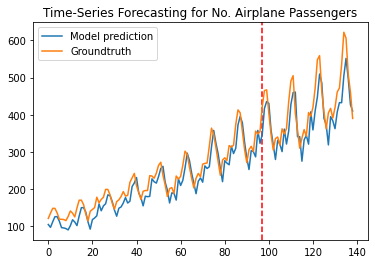

In [289]:
model6.eval()

predictions = model6(x)
predictions = predictions.data.cpu().numpy()


predictions = sc.inverse_transform(predictions)

labels = sc.inverse_transform(y)

plt.axvline(x=training_set_size, c='r', linestyle='--')
plt.plot(predictions, label='Model prediction')
plt.plot(labels, label='Groundtruth')
plt.legend()
plt.title('Time-Series Forecasting for No. Airplane Passengers')
plt.show()